# Import one dataset

In [75]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [2]:
column_names = ['BLCODE',
 'SUB',
 'AGE',
 'SEX',
 'YEAR',
 'DAY',
 'TIME',
 'ASH',
 'PRXY_TSA',
 'TSA',
 'MCI',
 'VENT',
 'AVM',
 'COMF',
 'ACT10',
 'ACT20',
 'ACT30',
 'ACT60',
 'MET',
 'CLO',
 'UPHOLST',
 'INSUL',
 'TA_H',
 'TA_M',
 'TA_L',
 'DEWPT',
 'PRTA-B',
 'TG_H',
 'TG_M',
 'TG_L',
 'VEL_H',
 'VEL_M',
 'VEL_L',
 'TURB_H',
 'TURB_M',
 'TURB_L',
 'TAAV',
 'TRAV',
 'TOP',
 'VELAV',
 'VELMAX',
 'TUAV',
 'PA',
 'RH',
 'ET',
 'SET',
 'TSENS',
 'DISC',
 'PMV',
 'PPD',
 'PD_H',
 'PD_M',
 'PD_L',
 'PD_MAX',
 'PCC',
 'PCC_AG',
 'PCS',
 'PCEC1',
 'PCEC2',
 'PCEC3',
 'PCEC4',
 'PCEC5',
 'PCEC6',
 'PCEC7',
 'PCED1',
 'PCED2',
 'PCED3',
 'PCED4',
 'PCED5',
 'PCED6',
 'PCED7',
 'day15_ta',
 'day06_ta',
 'dayav_ta',
 'day15_rh',
 'day06_rh',
 'dayav_rh',
 'day15_et',
 'day06_et',
 'dayav_et']

In [ ]:
data = pd.read_csv('8_EXL.csv', sep=',', skiprows=6, skipfooter=4, engine='python', usecols=[i for i in range(80)], header=None, names=column_names)

In [ ]:
# data[columns_to_normalize] = data.replace('.', np.nan)[columns_to_normalize].apply(lambda x:(x-x.mean())/x.std())
data.replace('.', np.nan)['ACT10'].astype(float).mean()

# Import all samples

In [10]:
datasets = []
for datafile in glob.glob('*_EXL.csv'):
    datasets.append(pd.read_csv(datafile, sep=',', skiprows=6, skipfooter=4, engine='python', usecols=[i for i in range(80)], header=None, names=column_names))
    
data_all = pd.concat(datasets)
select = data_all.apply(lambda r: any(['DIV' in str(e) or 'ACT10' in str(e) for e in r]),axis=1)

In [60]:
data_raw = data_all[~select].replace('.', np.nan).copy()
# strmap = {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '0':0}pd.to_numeric(df.ID, errors='coerce')
# data_raw.appl(float)

data_raw['MCI'] = pd.to_numeric(data_raw['MCI'], errors='coerce')
data_raw['ASH'] = pd.to_numeric(data_raw['ASH'], errors='coerce')
data_raw['TAAV'] = pd.to_numeric(data_raw['TAAV'], errors='coerce')
data_raw.to_csv('raw.csv')

# Normalize

In [12]:
columns_to_normalize = ['ACT10', 'ACT20', 'ACT30', 'ACT60', 'MET', 'CLO', 'UPHOLST', 'INSUL', 'TA_H', 'TA_M', 'TA_L', 'DEWPT', 'TG_M', 'VEL_M', 'TAAV', 'TRAV', 'TOP', 'VELAV', 'PA', 'RH', 'ET', 'SET', 'TSENS', 'DISC', 'PMV', 'PPD', 'PD_M', 'PD_MAX', 'PCC_AG', 'PCEC1', 'PCEC4', 'PCEC5', 'PCEC7', 'day15_ta', 'day06_ta', 'day15_rh', 'day06_rh', 'dayav_rh', 'day15_et', 'day06_et', 'dayav_et']
                             
clean_data = data_raw

# mean and sigma normalize
true_data = clean_data.copy()
true_data[columns_to_normalize] = true_data.loc[:,columns_to_normalize].apply(lambda x:(x.astype(float)-x.astype(float).mean())/x.astype(float).std())
true_data.to_csv('normalized_sigma.csv')

# mean and max - min normalize
maxmin_data = clean_data.copy()
maxmin_data[columns_to_normalize] = maxmin_data.loc[:,columns_to_normalize].apply(lambda x:(x.astype(float)-x.astype(float).min())/(x.astype(float).max()-x.astype(float).min()))
maxmin_data.to_csv('normalized_minmax.csv')

In [74]:
data_raw.shape

(5776, 80)

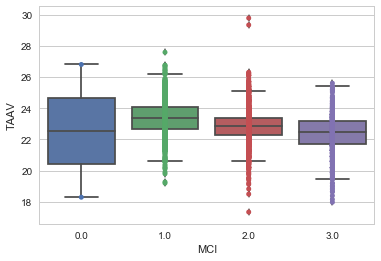

In [105]:
temp_mci_mean = [0, 0, 0,0]
temp_mci_var = [0,0,0,0]
for mci in [0,1,2,3]:
    temp_mci_mean[mci] = data_raw[data_raw['MCI']==mci]['TAAV'].mean()
    temp_mci_var[mci] = data_raw[data_raw['MCI']==mci]['TAAV'].var()
    
temp_mci_mean
temp_mci_var
temp_mci_mean

# sns.set(style="whitegrid", color_codes=True)
x = data_raw[data_raw['MCI'] != np.nan].MCI
y = data_raw[data_raw['MCI'] != np.nan].TAAV
sns.stripplot(x=x, y=y)

sns.boxplot(x,y)

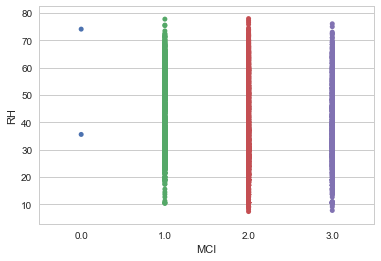

In [89]:
x = data_raw[data_raw['MCI'] != np.nan].MCI
y = data_raw[data_raw['MCI'] != np.nan].RH
sns.stripplot(x=x, y=y)

In [1]:
x = data_raw[(data_raw['MCI'] != np.nan) & (23<=data_raw['TAAV']<=24)].MCI
y = data_raw[(data_raw['MCI'] != np.nan) & (23<=data_raw['TAAV']<=24)].TAAV
sns.stripplot(x=x, y=y)


NameError: name 'data_raw' is not defined

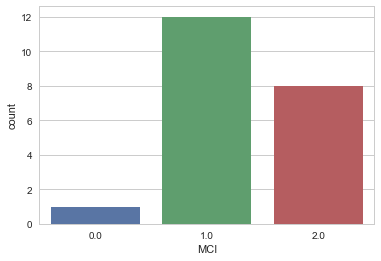

In [120]:
nan = np.NaN
x = data_raw.query('MCI != @nan and 26<=TAAV<=27').MCI
y = data_raw.query('MCI != @nan and 26<=TAAV<=27').TAAV
sns.countplot(x.dropna())
